In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [50]:
class Perceptron(object):
    """
    Perceptron classifier.
    
    
    Parameters
    ---------------------------
    eta: float
        Learning rate (between 0.0 and 1.0)
        
    n_iter: int
        Passes over the traning dataset
        
        
        
    Attributes    
    ---------------------------
    w_: 1d-array
        Weights after fitting
    
    errors_: list
        Number of misclassification in every epoch
    
    """
    
    def __init__(self, eta = 0.01, n_iter = 10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):       
        """
        fit the traning data
        
        Parameters
        ----------------------------
        X: {array-like}, shape = [n_sample, n_features]
            Training vectors, where n_samples is the number of samples and 
            n_features is the number of features
            
        y: array-like, shape = [n_samples]
            Target values.
            
            
        Returns
        ----------------------------
        self: object
        
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
                
            self.errors_.append(errors)    
        return self
    
    def net_input(self, X):
        """
        Calculate net input
        """
        return np.dot(X, self.w_[1:] + self.w_[0])
    
    def predict(self, X):
        """
        Return class label after unit step
        """
        return np.where(self.net_input(X) >= 0.0, 1, -1)

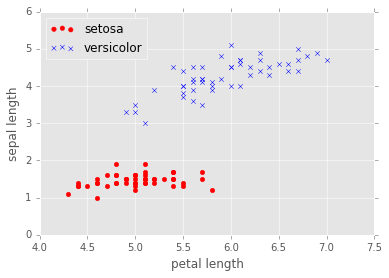

In [49]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)

y = df.iloc[0:100, 4].values

y = np.where(y == "Iris-setosa", -1, 1)

X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color = "red", marker = 'o', label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color = "blue", marker = 'x', label = 'versicolor')

plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc = 'upper left')

In [52]:
print Perceptron.fit.__doc__


        fit the traning data
        
        Parameters
        ----------------------------
        X: {array-like}, shape = [n_sample, n_features]
            Training vectors, where n_samples is the number of samples and 
            n_features is the number of features
            
        y: array-like, shape = [n_samples]
            Target values.
            
            
        Returns
        ----------------------------
        self: object
        
        


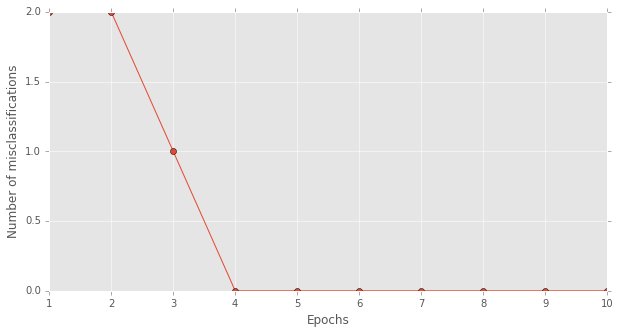

In [60]:
ppn = Perceptron(eta = 0.1, n_iter = 10)

ppn.fit(X, y)

plt.figure(figsize = (10, 5))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker = 'o')
plt.ylim = (0.0, 5.0)
plt.xlabel("Epochs")
plt.ylabel("Number of misclassifications")


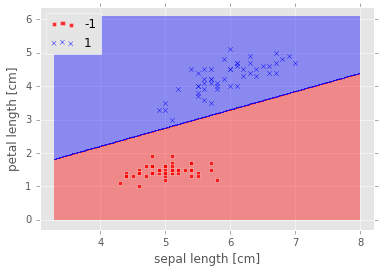

In [111]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, resolution = 0.02):
    """
    plot the colored map of dicision regions


    Parameters
    ----------------------------------
    X: pd.DataFrame, shape = [n_samples, n_features]
        Input data

    y: int
        Target value

    classifier: Perceptron
        Classifier used

    resolution: float
        width of each grid meshgird function generated

    Return
    -----------------------------------
    plt figure

    """

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    #plt.xlim(3.3, 7.98)
    #plt.ylim(0.0, 6.08)
    
    ### plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x       = X[y == cl, 0], 
                    y       = X[y == cl, 1], 
                    alpha   = 0.8, 
                    c       = cmap(idx), 
                    marker  = markers[idx],
                    label   = cl)

plot_decision_regions(X, y, classifier = ppn)
plt.xlabel("sepal length [cm]")
plt.ylabel("petal length [cm]")
plt.legend(loc = "upper left")